In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv("./train.csv")

In [8]:
train.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [9]:
train.tail(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878039,2003-01-06 00:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,NORTHERN,"ARREST, CITED",POLK ST / CALIFORNIA ST,-122.420692,37.790577
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685
878041,2003-01-06 00:31:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,RICHMOND,"ARREST, CITED",CLEMENT ST / 14TH AV,-122.472985,37.782552
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [10]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [11]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [24]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek        int8
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [23]:
train['DayOfWeek']=train['DayOfWeek'].astype('category').cat.codes

Text(0.5,0,'Day of the Week')

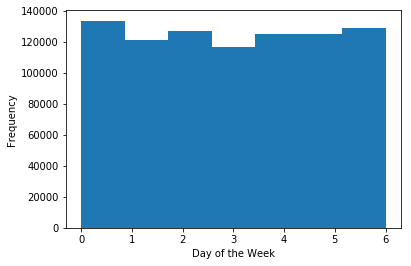

In [25]:
train['DayOfWeek'].plot(kind='hist', bins=7)
plt.xlabel('Day of the Week')

In [30]:
train['Dates'] = train['Dates'].astype('datetime64[ns]')

train['Date'] = [d.date() for d in train['Dates']]
train['Time'] = [d.time() for d in train['Dates']]

# Extract month, date, etc.
train['Year'] = [x.year for x in train['Date']]
train['Month'] = [x.month for x in train['Date']]
train['Day'] = [x.day for x in train['Date']]
train['Hour'] = [x.hour for x in train['Time']]

In [31]:
train.describe()

,DayOfWeek,X,Y,Year,Month,Day,Hour
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,2.990229,-122.422616,37.771020,2008.712046,6.436509,15.570623,13.412655
std,2.026102,0.030354,0.456893,3.631194,3.428972,8.783005,6.549573
min,0.000000,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,1.000000,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000
50%,3.000000,-122.416420,37.775421,2009.000000,6.000000,16.000000,14.000000
75%,5.000000,-122.406959,37.784369,2012.000000,9.000000,23.000000,19.000000
max,6.000000,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000


Text(0.5,0,'Year')

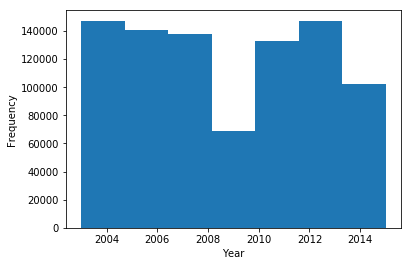

In [32]:
train['Year'].plot(kind='hist', bins=7)
plt.xlabel('Year')

Text(0.5,0,'Month')

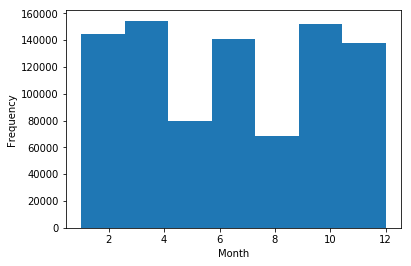

In [33]:
train['Month'].plot(kind='hist', bins=7)
plt.xlabel('Month')